In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'Statis Sans'

In [4]:
# set preferred language (de|en)
langPref = "de"
# expand text output
pd.set_option('display.max_colwidth', None)

<Axes: >

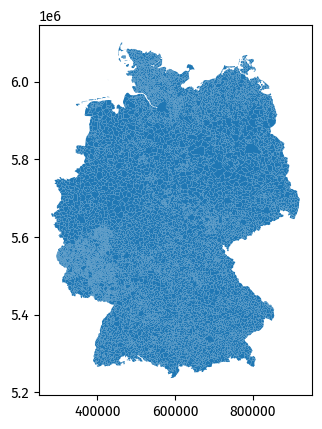

In [5]:
# erzeugt mit mapshaper.org : filter "GF==4"; filter-fields ARS; simplification 4%
gemeindegrenzen = gpd.read_file("VG250_GEM_simplified.zip").set_index("ARS")
gemeindegrenzen.plot()

<Axes: >

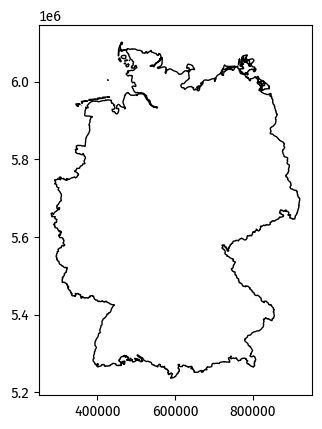

In [6]:
# erzeugt mit mapshaper.org : dissolve
bundesgrenze = gpd.read_file("VG250_DE_simplified.zip")
bundesgrenze.plot(facecolor="None")

<Axes: >

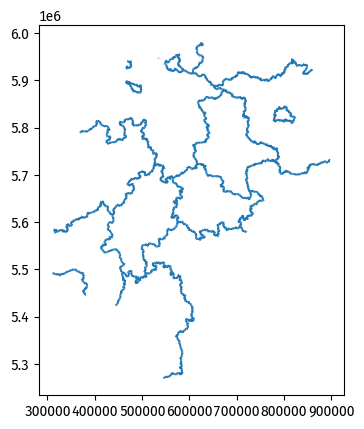

In [7]:
# erzeugt mit mapshaper.org : innerlines where='A.ARS.substring(0,2) != B.ARS.substring(0,2)'
laendergrenzen = gpd.read_file("VG250_LAN_mesh_simplified.zip")
laendergrenzen.plot()

### Insert API Token
Get yours free of charge at  
https://ergebnisse.zensus2022.de/datenbank/online#modal=web-service-api

In [10]:
myToken = "e34_XXXXX_14494_XXXXX___664_XXX_423"

In [9]:
# Set base path for API calls
BASE_URL = 'https://ergebnisse.zensus2022.de/api/rest/2020/'

### Check login credentials

In [10]:
hello = requests.get(BASE_URL + 'helloworld/logincheck', params={
    'username': myToken,
    'password': "",
    'language': langPref
})
hello.json()["Status"]

'Sie wurden erfolgreich an- und abgemeldet! Bei mehr als 3 parallelen Requests wurden länger als 15 Minuten laufende Requests beendet.'

### Catalogue Service

In [6]:
def catVal2Var(var):

    metadata = requests.get(BASE_URL + 'catalogue/values2variable', params={
        'username': myToken,
        'password': "",
        'language': langPref,
        'pagelength': 15000,  # there are 11.340 municipality names as of 2011
        'name': var
    })
    
    return(metadata.json()["List"])

In [7]:
agsList = catVal2Var("GEOGM4")

In [11]:
agsList[7654:7659]

[{'Code': '095770158158',
  'Content': 'Pappenheim, St',
  'Variables': '2',
  'Information': 'false'},
 {'Code': '095770161161',
  'Content': 'Pleinfeld, M',
  'Variables': '2',
  'Information': 'false'},
 {'Code': '095770162162',
  'Content': 'Polsingen',
  'Variables': '2',
  'Information': 'false'},
 {'Code': '095770168168',
  'Content': 'Solnhofen',
  'Variables': '2',
  'Information': 'false'},
 {'Code': '095770173173',
  'Content': 'Treuchtlingen, St',
  'Variables': '4',
  'Information': 'false'}]

In [12]:
infoList = []

for gm4 in agsList:
    if gm4["Information"]=="true":
        infoList.append(gm4["Code"])

In [13]:
len(infoList)

176

### Metadata Service

In [15]:
def metaVal(val):

    metadata = requests.get(BASE_URL + 'metadata/value', params={
        'username': myToken,
        'password': "",
        'language': langPref,
        'name': val
    })
    
    return(metadata.json()["Object"])

In [17]:
infoMetaList = []

for info in infoList:
    infoMetaList.append(metaVal(info))

In [39]:
infoMetaListDF = pd.DataFrame(infoMetaList)
infoMetaListDF

,Code,Content,Variables,Information,Updated
0,010535313002,Alt-Mölln,2,Bis 31.12.2018: Alt Mölln,19.06.2024 15:25:09h
1,032555408003,"Bodenwerder, Münchhausenstadt",2,Bis 24. Oktober 2013: Bodenwerder,19.06.2024 14:54:22h
2,033515402022,"Wienhausen, Klostergemeinde",2,Bis 11. August 2011: Wienhausen,19.06.2024 14:54:22h
3,033590010010,"Buxtehude, Hansestadt",4,Bis 27. April 2014: Buxtehude,19.06.2024 14:54:22h
4,033600025025,"Uelzen, Hansestadt",4,Bis 17. April 2016: Uelzen,19.06.2024 14:54:22h
...,...,...,...,...,...
171,160660063063,"Schmalkalden, Stadt",4,"Bis 15. Februar 2022: Schmalkalden, Kurort, Stadt",18.06.2024 09:15:47h
172,160660069069,"Steinbach-Hallenberg, Stadt",2,"Bis 17. Januar 2022: Steinbach-Hallenberg, Kurort, Stadt",18.06.2024 09:15:47h
173,160660074074,"Brotterode-Trusetal, Stadt",2,Bis 30. November 2011: Trusetal,18.06.2024 09:15:47h
174,160670064064,Bad Tabarz,2,Bis 8. März 2017: Tabarz/Thür. Wald.,18.06.2024 09:15:47h


In [40]:
sorbisch = infoMetaListDF[~infoMetaListDF["Information"].str.contains("Bis|In Hessen gibt es", regex=True)]
sorbisch

,Code,Content,Variables,Information,Updated
76,120520000000,"Cottbus, Stadt",4,"Cottbus/Chóśebuz, Stadt",21.06.2024 08:29:39h
77,120610316316,"Lübben (Spreewald), Stadt",4,"Lübben (Spreewald) / Lubin (Błota), Stadt",21.06.2024 08:29:39h
78,120610329329,Märkische Heide,2,Märkische Heide/Markojska Góla,21.06.2024 08:31:34h
80,120615113005,Alt Zauche-Wußwerk,2,Alt Zauche-Wußwerk/Stara Niwa-Wózwjerch,21.06.2024 08:31:34h
81,120615113061,Byhleguhre-Byhlen,2,Byhleguhre-Byhlen/Beła Góra-Bělin,21.06.2024 08:33:21h
...,...,...,...,...,...
161,146265237560,Trebendorf,2,Trebendorf / Trjebin,21.06.2024 07:35:27h
162,146265242590,Weißkeißel,2,Weißkeißel / Wuskidź,21.06.2024 07:35:27h
163,146265242600,"Weißwasser/O.L., Stadt",4,"Weißwasser/O.L., Stadt / Běła Woda",21.06.2024 07:36:28h
164,146265502190,Hohendubrau,2,Hohendubrau / Wysoka Dubrawa,21.06.2024 07:36:28h


In [41]:
sorbisch.to_excel("sorbisch.xlsx", index=False)

In [11]:
sorbisch = pd.read_excel("sorbisch.xlsx", dtype={"Code":str}).set_index("Code")

In [15]:
gemeindegrenzenSorbisch = gemeindegrenzen.join(sorbisch, how="right")

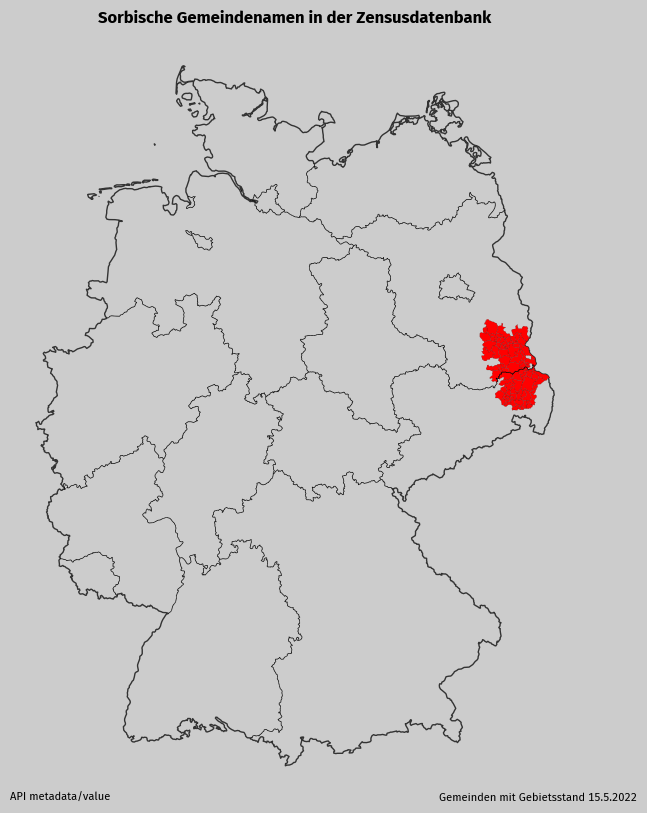

In [24]:
fig, ax = plt.subplots(1, figsize=(12,10))
fig.set_facecolor("#ccc")
ax.axis("off")

ax.set_title("Sorbische Gemeindenamen in der Zensusdatenbank", fontdict={"fontsize":12, "fontweight": "bold"})
ax.annotate("API metadata/value", xy=(0,0), xycoords="axes fraction", ha="left", fontsize=8)
ax.annotate("Gemeinden mit Gebietsstand 15.5.2022", xy=(1.1,0), xycoords="axes fraction", ha="right", fontsize=8)
bundesgrenze.plot(facecolor = "None", linewidth = 1, edgecolor = "#333", ax=ax )

gemeindegrenzenSorbisch.plot(facecolor="Red", edgecolor="#161616", linewidth=.1, ax=ax )

laendergrenzen.plot(facecolor = "None", linewidth = .5, edgecolor = "#000", ax=ax )
plt.savefig("sorbischeGemeindenamen.jpg", bbox_inches="tight", pad_inches=.15, dpi=150) #  .svg | .pdf | .png
plt.show()